In [3]:
from keras.datasets import cifar10

Using TensorFlow backend.


In [4]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

In [5]:
x_train.shape

(50000, 32, 32, 3)

In [6]:
x_train[0].shape

(32, 32, 3)

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

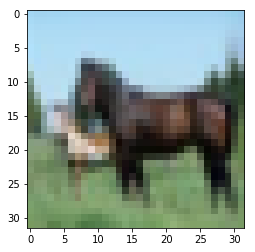

In [8]:
plt.imshow(x_train[12])

In [9]:
x_train.max()

255

In [10]:
x_train = x_train / 255

In [11]:
x_test = x_test / 255

In [12]:
x_test.shape

(10000, 32, 32, 3)

In [13]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [14]:
from keras.utils import to_categorical

In [15]:
y_cat_train = to_categorical(y_train,10)
y_cat_test = to_categorical(y_test,10)


In [16]:
from keras.models import Sequential

In [17]:
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [18]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256,activation='relu'))

model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])

In [19]:
model.fit(x_train,y_cat_train,verbose=1,epochs=10)

Epoch 1/10
50000/50000 [==============================] - 78s 2ms/step - loss: 1.5290 - acc: 0.4509
Epoch 2/10
50000/50000 [==============================] - 66s 1ms/step - loss: 1.1617 - acc: 0.5944
Epoch 3/10
50000/50000 [==============================] - 67s 1ms/step - loss: 1.0091 - acc: 0.6517
Epoch 4/10
50000/50000 [==============================] - 67s 1ms/step - loss: 0.9056 - acc: 0.6884
Epoch 5/10
50000/50000 [==============================] - 83s 2ms/step - loss: 0.8217 - acc: 0.7187
Epoch 6/10
50000/50000 [==============================] - 72s 1ms/step - loss: 0.7523 - acc: 0.7430
Epoch 7/10
50000/50000 [==============================] - 71s 1ms/step - loss: 0.6935 - acc: 0.7657
Epoch 8/10
50000/50000 [==============================] - 72s 1ms/step - loss: 0.6349 - acc: 0.7841
Epoch 9/10
50000/50000 [==============================] - 71s 1ms/step - loss: 0.5874 - acc: 0.8004
Epoch 10/10
50000/50000 [==============================] - 72s 1ms/step - loss: 0.5433 - acc: 0.8161

In [20]:
model.evaluate(x_test,y_cat_test)

10000/10000 [==============================] - 6s 553us/step


[1.1209513657569885, 0.6813]

In [21]:
from sklearn.metrics import classification_report

In [22]:
predictions = model.predict_classes(x_test)

In [30]:
predictions[10]

0

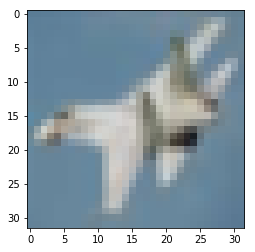

In [29]:
plt.imshow(x_test[10])

In [28]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.75      0.68      0.71      1000
          1       0.73      0.87      0.79      1000
          2       0.49      0.70      0.57      1000
          3       0.53      0.43      0.48      1000
          4       0.64      0.64      0.64      1000
          5       0.64      0.55      0.59      1000
          6       0.89      0.63      0.74      1000
          7       0.68      0.79      0.73      1000
          8       0.79      0.80      0.80      1000
          9       0.79      0.72      0.76      1000

avg / total       0.69      0.68      0.68     10000

